<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16930 entries, 0 to 16929
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  16930 non-null  object 
 1   Country Code  16930 non-null  object 
 2   Year          16930 non-null  int64  
 3   Value         16930 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 529.2+ KB
None
               Year         Value
count  16930.000000  1.693000e+04
mean    1991.530124  2.166063e+08
std       18.472387  7.115083e+08
min     1960.000000  2.715000e+03
25%     1976.000000  1.009540e+06
50%     1992.000000  6.748606e+06
75%     2008.000000  4.678519e+07
max     2023.000000  8.061876e+09


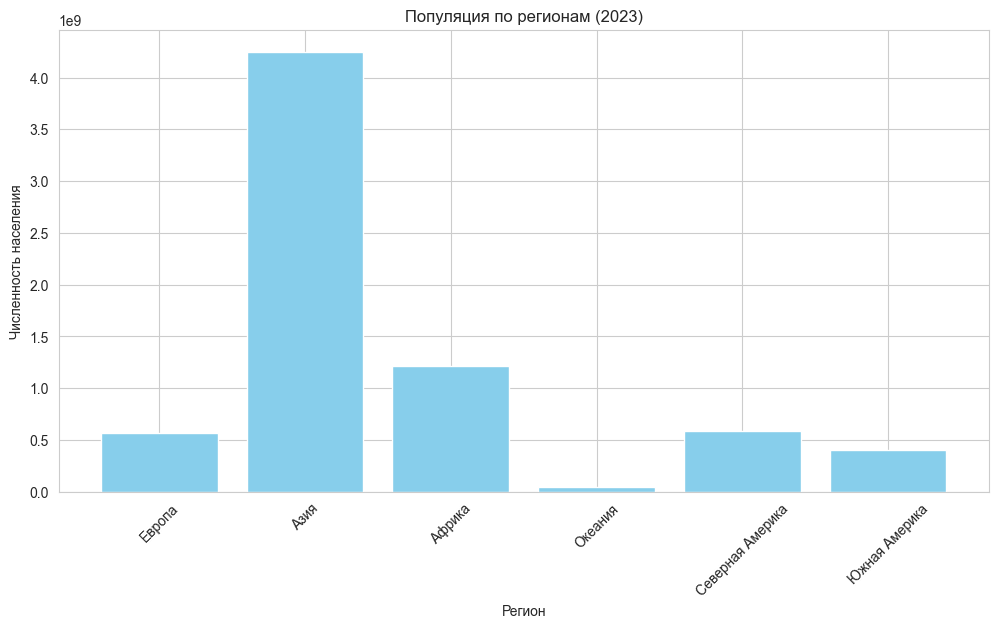

Обработка стран: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 153.32it/s]


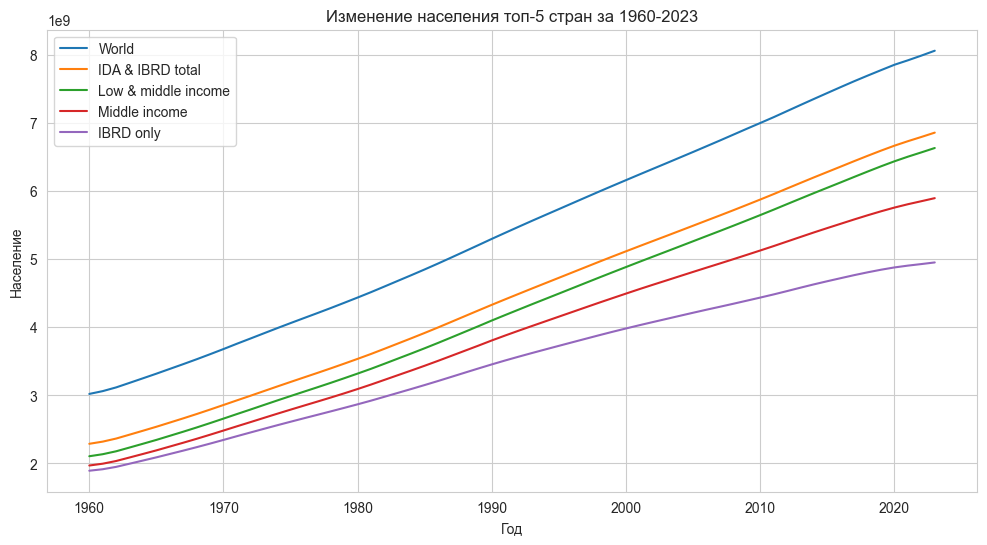

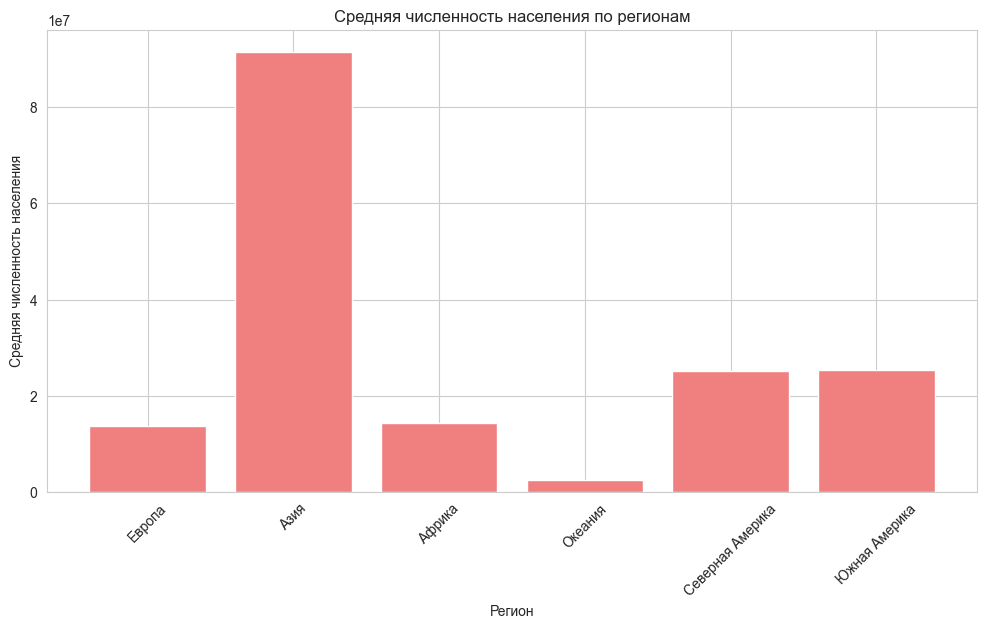

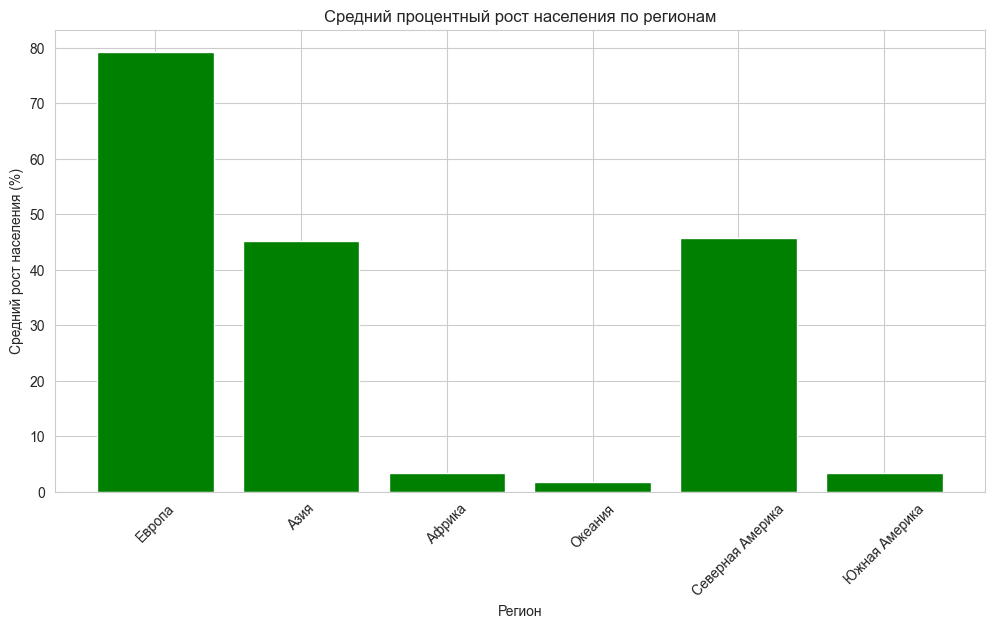

In [14]:
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Загрузка данных с прогресс-баром
df = pd.read_csv("population.csv")
# Базовый анализ данных
print(df.info())
print(df.describe())

# Определение регионов на основе существующих данных (например, по колонке "Country Name")

region_mapping = {
"Северная Америка": ["United States", "Canada", "Mexico", "Belize", "Costa Rica", "Cuba", "Dominican Republic", 
                    "El Salvador", "Guatemala", "Honduras", "Jamaica", "Nicaragua", "Panama", "Puerto Rico", 
                    "Trinidad and Tobago", "Bermuda", "Greenland", "Saint Pierre and Miquelon", "Bahamas"],
"Eвропа": ["Germany", "France", "United Kingdom", "Italy", "Spain", "Netherlands", "Belgium", "Sweden", 
            "Switzerland", "Poland", "Austria", "Norway", "Denmark", "Finland", "Ireland", "Portugal", 
            "Greece", "Czech Republic", "Hungary", "Slovakia", "Ukraine", "Romania", "Bulgaria", "Serbia", 
            "Croatia", "Slovenia", "Lithuania", "Latvia", "Estonia", "Luxembourg", "Iceland", "Malta", 
            "Andorra", "Belarus", "Monaco", "Liechtenstein", "Kosovo", "Faroe Islands", "Isle of Man", 
            "Gibraltar", "Channel Islands"],
"Азия": ["China", "India", "Japan", "South Korea", "Indonesia", "Vietnam", "Turkey", "Iran", "Thailand", 
          "Saudi Arabia", "Pakistan", "Malaysia", "Philippines", "United Arab Emirates", "Bangladesh", "Iraq", 
          "Kuwait", "Kazakhstan", "Uzbekistan", "Qatar", "Sri Lanka", "Oman", "Azerbaijan", "Lebanon", 
          "Jordan", "Myanmar", "Turkmenistan", "Bahrain", "Yemen", "Armenia", "Georgia", "Kyrgyzstan", 
          "Tajikistan", "Mongolia", "Nepal", "Bhutan", "Lao PDR", "Korea, Dem. People's Rep."],
"Африка": ["Nigeria", "South Africa", "Egypt", "Kenya", "Ethiopia", "Algeria", "Morocco", "Angola", "Ghana", 
            "Sudan", "Tunisia", "Cameroon", "Zimbabwe", "Senegal", "Zambia", "Uganda", "Mozambique", 
            "Botswana", "Namibia", "Madagascar", "Mali", "Niger", "Chad", "Burkina Faso", "Malawi", 
            "Cabo Verde", "Sao Tome and Principe", "Gambia", "Liberia", "Eritrea", "Djibouti", "Comoros", 
            "Equatorial Guinea", "Central African Republic", "Benin", "Guinea", "Togo", "Mauritania", 
            "Sierra Leone", "Seychelles", "Somalia", "Congo, Dem. Rep.", "Congo, Rep.", "Gabon"],
"Южная Америка": ["Brazil", "Argentina", "Colombia", "Chile", "Peru", "Venezuela", "Ecuador", "Bolivia", 
                   "Paraguay", "Uruguay", "Guyana", "Suriname"],
"Океания": ["Australia", "New Zealand", "Fiji", "Papua New Guinea", "Solomon Islands", "Vanuatu", "Samoa", 
             "Tonga", "French Polynesia", "New Caledonia", "Micronesia, Fed. Sts.", "Cook Islands", "Niue", 
             "Tokelau", "Pacific island small states"]
}

def get_region(country):
    for region, countries in region_mapping.items():
        if country in countries:
            return region

df["Region"] = df["Country Name"].apply(get_region)

# График популяции по регионам
region_population = df[df["Year"] == 2023].groupby("Region")["Value"].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(region_population["Region"], region_population["Value"], color='skyblue')
plt.xlabel("Регион")
plt.ylabel("Численность населения")
plt.title("Популяция по регионам (2023)")
plt.xticks(rotation=45)
plt.show()

top_countries = df[df["Year"] == 2023].nlargest(5, "Value")["Country Name"].tolist()
df_top = df[df["Country Name"].isin(top_countries)]

# График изменения населения во времени
plt.figure(figsize=(12, 6))
for country in tqdm(top_countries, desc="Обработка стран"):
    country_data = df_top[df_top["Country Name"] == country]
    plt.plot(country_data["Year"], country_data["Value"], label=country)

plt.xlabel("Год")
plt.ylabel("Население")
plt.title("Изменение населения топ-5 стран за 1960-2023")
plt.legend()
plt.show()

# График средней численности населения по регионам за весь период
region_avg_population = df.groupby("Region")["Value"].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(region_avg_population["Region"], region_avg_population["Value"], color='lightcoral')
plt.xlabel("Регион")
plt.ylabel("Средняя численность населения")
plt.title("Средняя численность населения по регионам")
plt.xticks(rotation=45)
plt.show()

# График распределения роста населения по регионам
region_population_growth = df.groupby("Region")["Value"].pct_change().groupby(df["Region"]).mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(region_population_growth["Region"], region_population_growth["Value"] * 100, color='green')
plt.xlabel("Регион")
plt.ylabel("Средний рост населения (%)")
plt.title("Средний процентный рост населения по регионам")
plt.xticks(rotation=45)
plt.show()
